In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Building a simple CNN model
model = Sequential([
    Input(shape=(64, 64, 3)),                # Define the input shape (64x64 RGB images)
    Conv2D(32, (3, 3), activation='relu'),   # 1st convolutional layer
    MaxPooling2D(pool_size=(2, 2)),          # 1st max-pooling layer
    Conv2D(64, (3, 3), activation='relu'),   # 2nd convolutional layer
    MaxPooling2D(pool_size=(2, 2)),          # 2nd max-pooling layer
    Flatten(),                               # Flatten feature maps into a 1D vector
    Dense(128, activation='relu'),           # Fully connected layer with 128 neurons
    Dropout(0.5),                            # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')           # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',                        # Adam optimizer
    loss='binary_crossentropy',              # Binary classification loss
    metrics=['accuracy']                     # Metric to track during training
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES =True

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = r"D:\COLLEGE NOTES\ai datasets\greenskill\Wildfire Prediction Dataset\train"
valid_dir = r"D:\COLLEGE NOTES\ai datasets\greenskill\Wildfire Prediction Dataset\valid"
test_dir = r"D:\COLLEGE NOTES\ai datasets\greenskill\Wildfire Prediction Dataset\test"

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)



Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [7]:
# Train the model
history = model.fit(
    train_generator,                     # Training data
    validation_data=valid_generator,     # Validation data
    epochs=10,                           # Number of epochs (adjust as needed)
    steps_per_epoch=len(train_generator),  # Steps per epoch (number of batches)
    validation_steps=len(valid_generator), # Steps for validation (number of batches)
    verbose=1                             # Display training progress
)


Epoch 1/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 365s 382ms/step - accuracy: 0.8590 - loss: 0.3159 - val_accuracy: 0.9381 - val_loss: 0.1572
Epoch 2/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 224s 237ms/step - accuracy: 0.9321 - loss: 0.1875 - val_accuracy: 0.9492 - val_loss: 0.1346
Epoch 3/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 247s 261ms/step - accuracy: 0.9363 - loss: 0.1727 - val_accuracy: 0.9540 - val_loss: 0.1227
Epoch 4/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 235s 248ms/step - accuracy: 0.9441 - loss: 0.1514 - val_accuracy: 0.9471 - val_loss: 0.1507
Epoch 5/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 284s 300ms/step - accuracy: 0.9491 - loss: 0.1358 - val_accuracy: 0.9381 - val_loss: 0.1651
Epoch 6/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 271s 286ms/step - accuracy: 0.9504 - loss: 0.1336 - val_accuracy: 0.9533 - val_loss: 0.1411
Epoch 7/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 286s 303ms/step - accuracy: 0.9547 - loss: 0.1235 - val_accuracy: 0.9586 - val_loss: 0.1189
Epoch 8/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 248s 262ms/step - accuracy: 0.9586 -

In [32]:
# Save in HDF5 format
model.save(r"D:\COLLEGE NOTES\ai datasets\greenskill\forestcover_classifier_model.h5")



In [13]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


197/197 ━━━━━━━━━━━━━━━━━━━━ 78s 396ms/step - accuracy: 0.9678 - loss: 0.0916
Test Loss: 0.09776496887207031
Test Accuracy: 0.9666666388511658


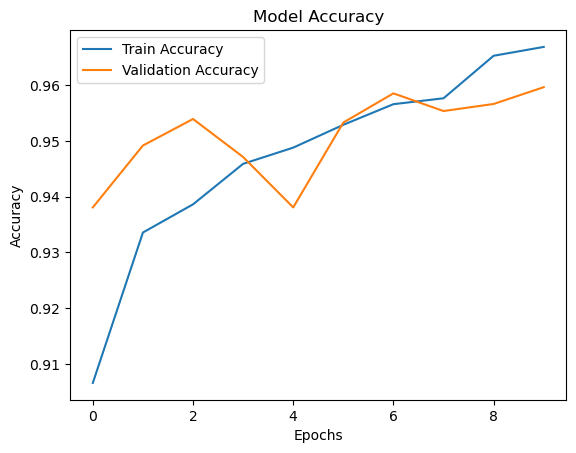

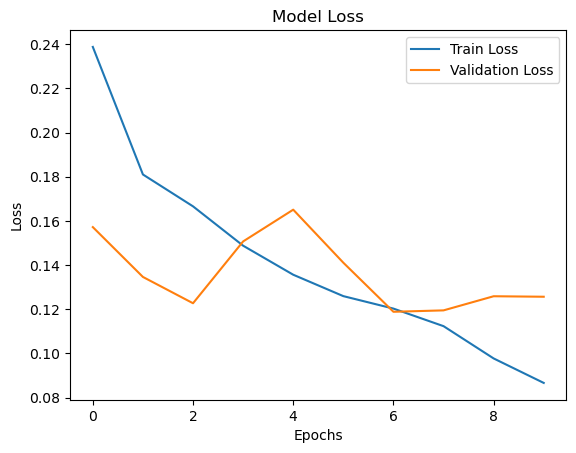

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Path to the trained model
model_path = r"D:\COLLEGE NOTES\ai datasets\greenskill\wildfire_classifier_model.h5"

# Path to the image for prediction
img_path = r"D:\COLLEGE NOTES\ai datasets\greenskill\Wildfire Prediction Dataset\test\nowildfire\-73.56986,45.462195.jpg"

# Validate paths
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image file not found at: {img_path}")

# Load the trained model
model = load_model(model_path)
print("Model loaded successfully!")

# Preprocess the image
try:
    img = image.load_img(img_path, target_size=(64, 64))  # Resize image to model's input size
    img_array = image.img_to_array(img) / 255.0          # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
    print("Image preprocessed successfully!")
except Exception as e:
    print(f"Error loading image: {e}")
    exit()

# Predict using the model
prediction = model.predict(img_array)

# Interpret the result
if prediction[0][0] > 0.5:
    print(f"The model predicts a forestcover with a confidence of {prediction[0][0] * 100:.2f}%.")
else:
    print(f"The model predicts no forest cover with a confidence of {(1 - prediction[0][0]) * 100:.2f}%.")




Model loaded successfully!
Image preprocessed successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
The model predicts no forest cover with a confidence of 100.00%.


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


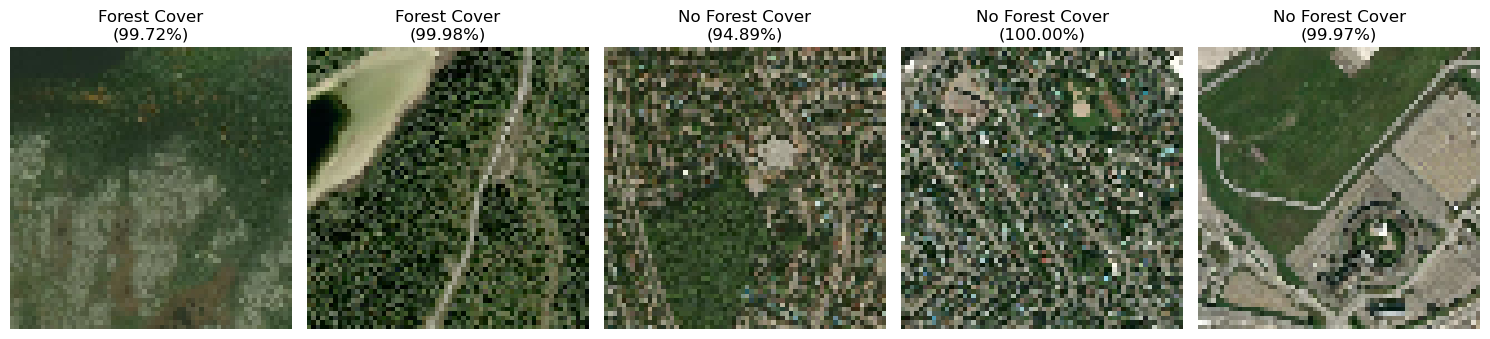

In [34]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the trained model
model_path = r"D:\COLLEGE NOTES\ai datasets\greenskill\forestcover_classifier_model.h5"

# Directory containing images for prediction
images_dir = r"D:\COLLEGE NOTES\ai datasets\greenskill\wilflife prediction  5 images"

# Validate paths
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")
if not os.path.exists(images_dir):
    raise FileNotFoundError(f"Images directory not found at: {images_dir}")

# Load the trained model
model = load_model(model_path)
print("Model loaded successfully!")

# Get all image paths from the directory
image_files = [os.path.join(images_dir, fname) for fname in os.listdir(images_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]

# Select up to 5 images
image_files = image_files[:5]  # Adjust as needed

# Initialize plot
plt.figure(figsize=(15, 5))

for idx, img_path in enumerate(image_files):
    try:
        # Preprocess the image
        img = image.load_img(img_path, target_size=(64, 64))  # Resize image to model's input size
        img_array = image.img_to_array(img) / 255.0          # Normalize pixel values to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension

        # Predict using the model
        prediction = model.predict(img_array)
        prediction_label = "Forest Cover" if prediction[0][0] > 0.5 else "No Forest Cover"
        confidence = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100

        # Display the image with its prediction
        plt.subplot(1, 5, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{prediction_label}\n({confidence:.2f}%)")

    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

# Show the plot
plt.tight_layout()
plt.show()
